In [11]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

In [12]:
X_train_array = np.load("kmnist-train-imgs.npz")["arr_0"]
y_train_array = np.load("kmnist-train-labels.npz")["arr_0"]
X_test_array = np.load("kmnist-test-imgs.npz")["arr_0"]
y_test_array = np.load("kmnist-test-labels.npz")["arr_0"]

In [13]:
X_train = X_train_array/255.0
X_test = X_test_array/255.0

In [34]:
model = keras.Sequential(
    [
        keras.Input(shape=(28, 28)),
        layers.Conv1D(32,3,padding="valid", activation="relu"),
        layers.MaxPooling1D(),
        layers.Conv1D(64, 3, activation="relu"),
        layers.MaxPooling1D(),
        layers.Conv1D(128, 3, activation="relu"),
        layers.Flatten(),
        layers.Dense(64, activation="relu"),
        layers.Dense(10),
    ]
)

print(model.summary())

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_3 (Conv1D)                    │ (None, 26, 32)              │           2,720 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_2 (MaxPooling1D)       │ (None, 13, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_4 (Conv1D)                    │ (None, 11, 64)              │           6,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_3 (MaxPooling1D)       │ (None, 5, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_5 (Conv1D)                    │ (None, 3, 128)              │          24,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_10 (Flatten)                 │ (None, 384)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 64)                  │          24,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 58,922 (230.16 KB)

 Trainable params: 58,922 (230.16 KB)

 Non-trainable params: 0 (0.00 B)

None


In [35]:
model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.Adam(),
    metrics=["accuracy"],
)

model.fit(X_train, y_train_array, batch_size=64, epochs=20)
model.evaluate(X_test, y_test_array, batch_size=64)

Epoch 1/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7425 - loss: 0.7992
Epoch 2/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9299 - loss: 0.2249
Epoch 3/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.9534 - loss: 0.1490
Epoch 4/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9659 - loss: 0.1131
Epoch 5/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9725 - loss: 0.0915
Epoch 6/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9773 - loss: 0.0704
Epoch 7/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9812 - loss: 0.0592
Epoch 8/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9840 - loss: 0.0503
Epoch 9/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9865 - loss: 0.0420
Epoch 10/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.9880 - loss: 0.0360
Epoch 11/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9919 - loss: 0.0259
Epoch 12/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/st

[0.4655589461326599, 0.9236999750137329]

In [36]:
y_predicted=model.predict(X_test)
y_pred = [np.argmax(i) for i in y_predicted]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [37]:
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay

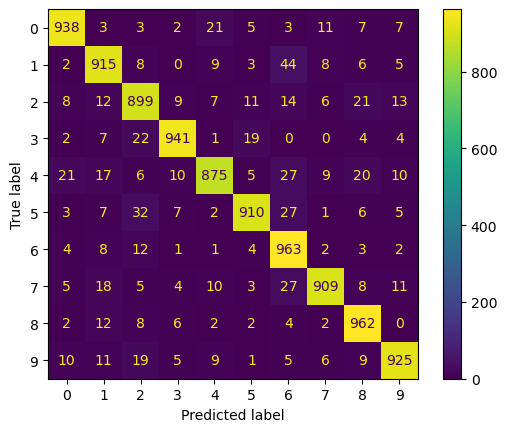

In [38]:
ConfusionMatrixDisplay(confusion_matrix(y_test_array,y_pred)).plot()

In [39]:
print(classification_report(y_test_array,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      1000
           1       0.91      0.92      0.91      1000
           2       0.89      0.90      0.89      1000
           3       0.96      0.94      0.95      1000
           4       0.93      0.88      0.90      1000
           5       0.94      0.91      0.93      1000
           6       0.86      0.96      0.91      1000
           7       0.95      0.91      0.93      1000
           8       0.92      0.96      0.94      1000
           9       0.94      0.93      0.93      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000

